In [1]:
import random
import numpy as np

def create_reference_solution(chromosome_length):

    number_of_ones = int(chromosome_length / 2)

    # Build an array with an equal mix of zero and ones
    reference = np.zeros(chromosome_length)
    reference[0: number_of_ones] = 1

    # Shuffle the array to mix the zeros and ones
    np.random.shuffle(reference)
    
    return reference

In [2]:
# Print an example target array
print (create_reference_solution(70))

[0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.]


In [3]:
def create_starting_population(individuals, chromosome_length):
    # Set up an initial array of all zeros
    population = np.zeros((individuals, chromosome_length))
    # Loop through each row (individual)
    for i in range(individuals):
        # Choose a random number of ones to create
        ones = random.randint(0, chromosome_length)
        # Change the required number of zeros to ones
        population[i, 0:ones] = 1
        # Sfuffle row
        np.random.shuffle(population[i])
    
    return population

In [4]:
print (create_starting_population(4, 10))

[[1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
def calculate_fitness(reference, population):
    # Create an array of True/False compared to reference
    identical_to_reference = population == reference
    # Sum number of genes that are identical to the reference
    fitness_scores = identical_to_reference.sum(axis=1)
    
    return fitness_scores

In [6]:
reference = create_reference_solution(10)
print ('Reference solution: \n', reference)
population = create_starting_population(6, 10)
print ('\nStarting population: \n', population)
scores = calculate_fitness(reference, population)
print('\nScores: \n', scores)

Reference solution: 
 [1. 1. 0. 1. 0. 0. 0. 0. 1. 1.]

Starting population: 
 [[0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]]

Scores: 
 [5 4 7 6 4 5]


In [7]:
def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return the chromsome of the winner
    return population[winner, :]

In [8]:
# Set up and score population
reference = create_reference_solution(10)
population = create_starting_population(6, 10)
scores = calculate_fitness(reference, population)

# Pick two parents and dispplay
parent_1 = select_individual_by_tournament(population, scores)
parent_2 = select_individual_by_tournament(population, scores)
print (parent_1)
print (parent_2)

[0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
[0. 1. 1. 0. 1. 1. 0. 1. 1. 1.]


In [9]:
def breed_by_crossover(parent_1, parent_2):
    # Get length of chromosome
    chromosome_length = len(parent_1)
    
    # Pick crossover point, avoding ends of chromsome
    crossover_point = random.randint(1,chromosome_length-1)
    
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0:crossover_point],
                        parent_2[crossover_point:]))
    
    child_2 = np.hstack((parent_2[0:crossover_point],
                        parent_1[crossover_point:]))
    
    # Return children
    return child_1, child_2

In [10]:
# Set up and score population
reference = create_reference_solution(15)
population = create_starting_population(100, 15)
scores = calculate_fitness(reference, population)

# Pick two parents and dispplay
parent_1 = select_individual_by_tournament(population, scores)
parent_2 = select_individual_by_tournament(population, scores)

# Get children
child_1, child_2 = breed_by_crossover(parent_1, parent_2)

# Show output
print ('Parents')
print (parent_1)
print (parent_2)
print ('Children')
print (child_1)
print (child_2)

Parents
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Children
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
def randomly_mutate_population(population, mutation_probability):
    
    # Apply random mutation
        random_mutation_array = np.random.random(
            size=(population.shape))
        
        random_mutation_boolean = \
            random_mutation_array <= mutation_probability

        population[random_mutation_boolean] = \
        np.logical_not(population[random_mutation_boolean])
        
        # Return mutation population
        return population

In [12]:
# Set up and score population
reference = create_reference_solution(15)
population = create_starting_population(100, 15)
scores = calculate_fitness(reference, population)

# Pick two parents and display
parent_1 = select_individual_by_tournament(population, scores)
parent_2 = select_individual_by_tournament(population, scores)

# Get children and make new population 
child_1, child_2 = breed_by_crossover(parent_1, parent_2)
population = np.stack((child_1, child_2))

# Mutate population
mutation_probability = 0.25
print ("Population before mutation")
print (population)
population = randomly_mutate_population(population, mutation_probability)
print ("Population after mutation")
print (population)

Population before mutation
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0.]]
Population after mutation
[[1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]]


Starting best score, percent target: 65.3
End best score, percent target: 100.0


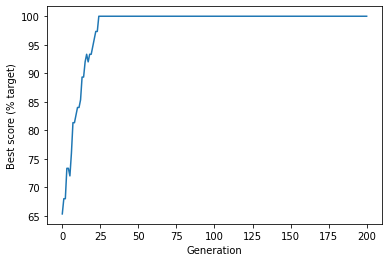

In [13]:
# Set general parameters
chromosome_length = 75
population_size = 500
maximum_generation = 200
best_score_progress = [] # Tracks progress

# Create reference solution 
# (this is used just to illustrate GAs)
reference = create_reference_solution(chromosome_length)

# Create starting population
population = create_starting_population(population_size, chromosome_length)

# Display best score in starting population
scores = calculate_fitness(reference, population)
best_score = np.max(scores)/chromosome_length * 100
print ('Starting best score, percent target: %.1f' %best_score)

# Add starting best score to progress tracker
best_score_progress.append(best_score)

# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, scores)
        parent_2 = select_individual_by_tournament(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.002
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    scores = calculate_fitness(reference, population)
    best_score = np.max(scores)/chromosome_length * 100
    best_score_progress.append(best_score)

# GA has completed required generation
print ('End best score, percent target: %.1f' %best_score)

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()